## Distância Euclidiana

A distância euclidiana é uma medida de distância entre dois pontos em um espaço euclidiano. Ela é nomeada em homenagem ao matemático grego Euclides.

Seja \( P_1 \) e \( P_2 \) dois pontos no espaço euclidiano com coordenadas \( P_1(x_1, y_1, z_1) \) e \( P_2(x_2, y_2, z_2) \), a distância euclidiana \( d \) entre esses dois pontos é dada pela fórmula:

\[
d(P_1, P_2) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
\]

## Cálculo das Distâncias Euclidianas para as Observações

Primeiro, vamos definir as observações e o ponto de teste como arrays do numpy.


In [2]:
import numpy as np

# Define the observations
observations = np.array([
    [0, 3, 0],
    [2, 0, 0],
    [0, 1, 3],
    [0, 1, 2],
    [-1, 0, 1],
    [1, 1, 1]
])

# Define the test point
test_point = np.array([0, 0, 0])


Agora, vamos calcular a distância euclidiana entre cada observação e o ponto de teste.


In [2]:
# Compute the Euclidean distances
distances = np.linalg.norm(observations - test_point, axis=1)
distances

array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])

Ao executar o código acima, você obterá um array contendo as distâncias euclidianas entre o ponto de teste e cada uma das observações.


Exemplo de K-nearest em gráfico

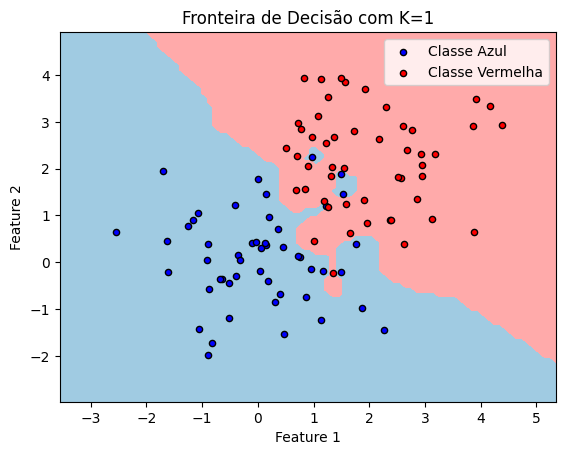

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Gerando dados de exemplo
np.random.seed(0)
blue_points = np.random.randn(50, 2)
red_points = np.random.randn(50, 2) + [2, 2]

# Dados de treinamento
X = np.vstack([blue_points, red_points])
y = np.hstack([np.zeros(50), np.ones(50)])  # 0: azul, 1: vermelho

# Treinando o modelo KNN com K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Criando uma grade de pontos para plotar a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predizendo a classe para cada ponto na grade
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão
cmap_background = ListedColormap(['#A0CBE2', '#FFAAAA'])
plt.contourf(xx, yy, Z, cmap=cmap_background)

# Plotando os pontos de treinamento
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', edgecolor='k', s=20, label='Classe Azul')
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', edgecolor='k', s=20, label='Classe Vermelha')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fronteira de Decisão com K=1')
plt.legend()
plt.show()

## (b) What is our prediction with K = 1? Why? (c) What is our prediction with K = 3? Why?

Para uma distância K=1 a distância mais próxima é 1,41, do ponto 5, marcado como VERDE. Portanto, a previsão é que o ponto com K=1 seja VERDE. Já com um K=3 3 temos uma área que abrange pontos Verdes (5 e 4) e Vermelhos (1, 2 e 6). Apesar dos mais próximo serem verdes em maioria, dentro do raio K=3 temos mais vermlhos, portando ele seria VERMELHO.

## (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

## Fronteira de Decisão de Bayes e KNN

No contexto do K-nearest neighbors (KNN):

### 1. Aproximação da Fronteira de Decisão de Bayes
O KNN é um método não paramétrico, o que significa que ele não faz suposições fortes sobre a forma funcional da fronteira de decisão. Em vez disso, tenta aprender a fronteira de decisão diretamente dos dados. Teoricamente, à medida que o número de observações (ou pontos de dados) \( n \) tende ao infinito e com a escolha adequada do número de vizinhos \( K \) (isto é, \( K \) cresce com \( n \) mas \( \frac{K}{n} \) tende a zero), o KNN pode aproximar a fronteira de decisão de Bayes. No entanto, na prática, devido ao ruído e à quantidade finita de dados, pode haver desvios.

### 2. Influência de \( K \) na Fronteira de Decisão
O valor de \( K \) tem um impacto significativo na suavidade da fronteira de decisão no KNN.
- **\( K = 1 \)**: A fronteira de decisão é altamente irregular e se adapta muito aos dados de treinamento, potencialmente capturando muito ruído. Isso pode levar ao sobreajuste.
- **\( K \) grande**: A fronteira de decisão torna-se mais suave, resultando em um modelo mais resistente ao ruído e menos propenso ao sobreajuste. No entanto, um \( K \) muito grande pode levar a um subajuste, onde o modelo é muito generalizado e pode não capturar características importantes dos dados.

### 3. Relevância da Distância
Em problemas onde a fronteira de decisão de Bayes é altamente não linear ou complexa, a capacidade do KNN de se adaptar aos dados sem fazer suposições paramétricas pode ser vantajosa. A métrica de distância usada (por exemplo, Euclidiana) e, em alguns casos, a ponderação baseada na distância (onde vizinhos mais próximos têm mais influência) podem afetar a forma da fronteira de decisão.

### 4. Limitações em Relação à Fronteira de Decisão de Bayes
Embora o KNN possa se aproximar da fronteira de decisão de Bayes sob certas condições, existem limitações práticas. A qualidade da aproximação depende da densidade e distribuição dos dados, do ruído presente, da escolha de \( K \) e da métrica de distância. Em áreas do espaço de entrada onde os dados são escassos ou as classes são muito sobrepostas, o KNN pode ter dificuldade em aproximar a verdadeira fronteira de decisão de Bayes.

Em resumo, enquanto o KNN tem o potencial de se aproximar da fronteira de decisão de Bayes, especialmente em cenários com muitos dados e fronteiras complexas, a eficácia prática do algoritmo depende de vários fatores, incluindo a escolha do número de vizinhos \( K \) e a natureza dos dados em si.


## (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
Se a fronteira é altamente linear temos um problema. Caso o valor de K seja muito grande ele pode não capturar as nuances das fronteiras e ser influenciado de maneira desproporcional por pontos não relevantes à fronteira. Caso ele seja menor, os pontos que trazem mais informação sobre a não linearidade da fronteira podem ter mais influência na decisão de classificação.